<a href="https://colab.research.google.com/github/datagrad/DataScience-Projects/blob/main/Bike_Sharing_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkred"><u><center> **Linear Regression -  Bike Sharing Assignment**


#Project Requirement and Artifacts

####**Bike-sharing Service**
The bike-sharing system is a service in which bikes are made available for shared use to individuals on a short-term basis for a price or free.
Many bike share systems allow people to borrow a bike from a computer-controlled dock, where a user can enter the payment information for the system to unlock it. The user can further return the bike to any other computer-controlled dock belonging to the same system.


####**Case of BoomBikes**
BoomBikes is a US-based bike-sharing provider. It has recently suffered considerable dips in its revenues due to the ongoing Corona pandemic and is finding it very difficult to sustain itself in the current market scenario.
They have decided to align their future business with a Machine Learning based model to recover from the current business scenario once lockdown ends. They aspire to understand the demand for shared bikes among the people after the quarantine situation ends.
They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.



####**Project Goal**
With this project, we will try:
1.	To understand the factors on which the demand for these shared bikes depends.
2.	To identify the variables that are significant in predicting the demand for shared bikes.
3.	To understand how well a variable describes the bike demands if a Variable is significant.

####**Business Goal:**
With this Machine Learning project, we will try to model the demand for shared bikes with the available independent variables.

This model can be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
Further, the model will be a good way for management to understand the demand dynamics of a new market. 


# Subjective Questions
1. Anscombe’s quartet

https://www.youtube.com/watch?v=Kd--Q-aTwpM

2. Pearson’s R?

https://www.youtube.com/watch?v=2B_UW-RweSE&t=177s


3. You might have observed that sometimes the value of VIF is infinite. Why does this happen?

An infinite VIF value indicates that the corresponding variable may be expressed exactly by a linear combination of other variables (which show an infinite VIF as well).


4. What is a Q-Q plot? Explain the use and importance of a Q-Q plot in linear regression.

https://www.statisticshowto.com/q-q-plots/#:~:text=The%20purpose%20of%20Q%20Q%20plots,fall%20on%20that%20reference%20line.&text=It's%20being%20compared%20to%20a,data%20on%20the%20y%2Daxis.

https://medium.com/@premal.matalia/q-q-plot-in-linear-regression-explained-ab040567d86f

#Steps & Details

1.   Import Libraries
2.   Read, Understand and Basic Manipulation of the Data
      *   Read
      *   Shape
      *   Info (Data Type, Null Values)
      *   Describe to check consistency of Data
      *   Check the Unique values, and count to understand the data type 

3.   Data Visualization to check correlation (#Delete Confused if required for each variables )
      *   Univariate for Numerical Data: dist plot
      *   Categorical Data: Box Plot
      Collinearity
      *   Numerical Data : sns plot
      *   Categorical Data: 

4.   Data Preparation
      *   If Categorical data is in Numerical terms
      *   Change and re-check if it is in correct Binary form 

5.   Split the data into Train and Test 
      *   Split
      *   Verify the shape

6.   Rescaling the Features
      *   Re-scale the Numerical Variables
      *   Plot the Heatmap to check correlation of Dependent Vs Independent Variables

7.   Model Building
      *   Divide training data into Y_train (target Variable) & X-train (Predicter Variables)
      *   pick one from X- set and create Linear regression model 
        *   check P value (better if near zero)
        *   check Adj. R-square value (better if near 1)
      *   Add one by one from X- set and create Linear regression model 
        *   check P value (better if near zero)
        *   check Adj. R-square value (better if near 1)
      *   All Added
        *   	Notice the variables with higher value of p, they are insignificant

      *   Time for elimination:

        *   Check the VIF Value (VIF>5 is insignificant)
        *   identify the variable with hight VIF and P Value
	drop that
        *   check Adj. R-square value
	do it one by one till all the variables are significant

      *   Method 2


8.   Residual Analysis

      *   Read
      *   Shape
9.   Insights and Predictions
      *   Read
      *   Shape


10.  Determine the R2_score with sklearn



# <span style="color:IndianRed ;">1. Import all necessary libraries

In [1]:
#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import train test library from sklearn
from sklearn.model_selection import train_test_split

# Import minmax scaler
from sklearn.preprocessing import MinMaxScaler

#Import required libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Import the statsmodels library
import statsmodels.api as sm  

# Import statsmodels library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Connect the data from Drive (To Be Deleted)

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# <span style="color:IndianRed ;">2. Import, Read and Understand the Data

####Import and Read the Data

In [5]:
# Read teh CSV data file
bikedata = pd.read_csv("/content/gdrive/My Drive/day.csv")
#bikedata = pd.read_csv("day.csv")   for jupyter

bikedata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


####Inspect the various aspects of the dataframe

In [6]:
bikedata.shape

(730, 16)

There are 730 rows and 16 columns in dataset

####Info

In [7]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


####Unique Counts in each column

In [8]:
#Unique Values to identify variable type
bikedata.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
instant       730
dteday        730
dtype: int64

####Describe the data

In [9]:
bikedata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### **Data Insights:**


1.   There are no column with null value.
2.   The `dteday` is in object type and needs to be converted to `datetime data type`.
3.   All the column data type is either `int` or `float` as per info tab, but `nunique()` indicates that:
  *   	7 Columns are actually object type data (`yr`, `holiday`, `workingday`, `weathersit`, `season`, `weekday`, `mnth`),
  *   	8 Columns are of numerical data type,
  *   	1 column is of datetime data type.

4.   The `describe` function indicates a consistent pattern for all the Numerical Variables.

**Categorical variable:**
- `yr`
- `holiday`
- `workingday`
- `weathersit`
- `season`
- `weekday`
- `mnth`

We will create `dummy variables` for few of these Categorical variables in the cleaning stage.

**Numerical variable:**
- `temp`
- `hum`
- `casual`
- `windspeed`
- `registered`
- `atemp`
- `cnt`
- `instant`
- `dteday`

As mentioned in the problem statement `cnt` is our target variable which is a agregation of `casual` and `registered` columns, and hence both can be dropped (but after confirming the collinearity).

# <span style="color:IndianRed ;">3. Clean and Visualize the Data

#### Data type  Conversion
Convert the data type of dteday from object to date.


In [10]:
#bikedata['dteday'] = bikedata['dteday'].astype('datetime64') 
#bikedata['dteday']

#### Data Visualisation

**Understanding the data through visualization**.
- If there is some obvious multicollinearity going on, this is the first place to catch it.
- With this we will try to identify if some predictors directly have a strong association with the outcome variable.
- Also we will try to identify if some predictors directly have a strong association with another predictor.

We'll visualise our data using `matplotlib` and `seaborn`.


**Steps:** <br/>

3.1.   Univariate
  - Dist Plot for Numerical
  - Give insight  

3.2.   Visualizing Categorical Variable
  - Box plot
  - Give Insight

#### <span style="color:RoyalBlue ;">Distplot for Univariate Analysis of Numerical Variables

<function matplotlib.pyplot.show>

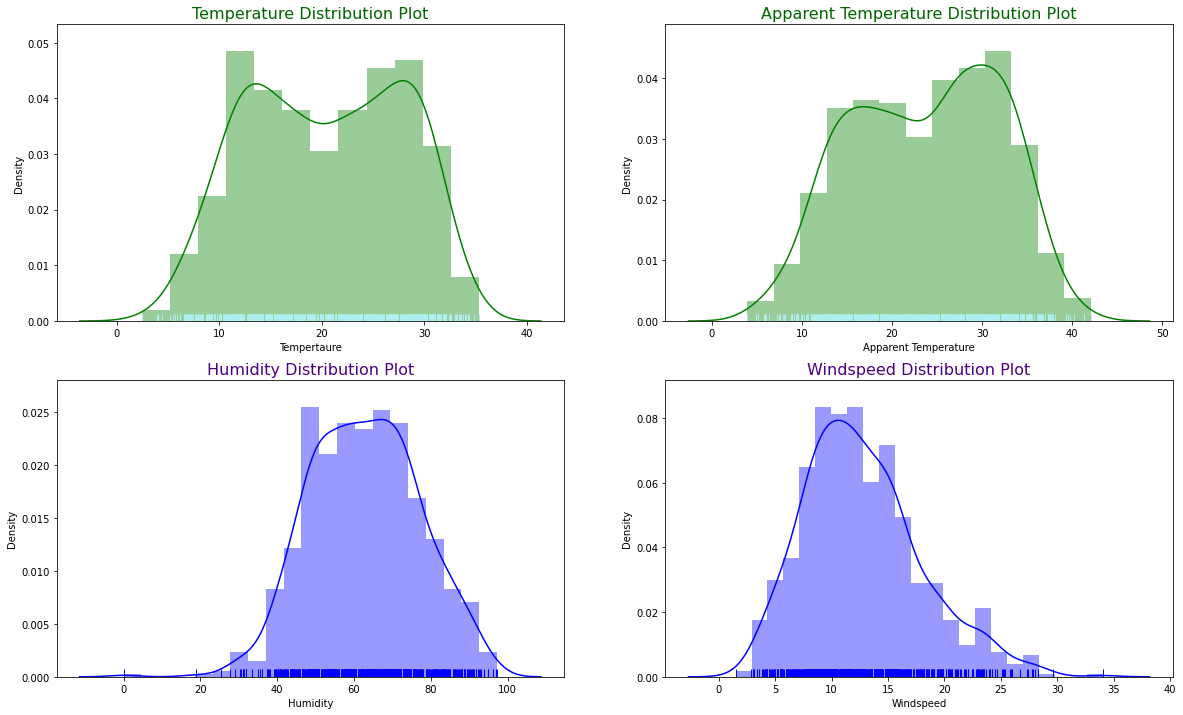

In [11]:
plt.figure(figsize=(20, 12))


plt.subplot(2,2,1)
sns.distplot(bikedata.temp, rug=True,rug_kws={"color": "paleturquoise"} ,axlabel = "Tempertaure",color= "g")
plt.title("Temperature Distribution Plot", fontsize=16, color= "darkgreen")
plt.show

plt.subplot(2,2,2)
sns.distplot(bikedata.atemp, rug=True,rug_kws={"color": "paleturquoise"}, axlabel = "Apparent Temperature",color= "g")
plt.title("Apparent Temperature Distribution Plot", fontsize=16, color= "darkgreen")
plt.show

plt.subplot(2,2,3)
sns.distplot(bikedata.hum, rug=True,rug_kws={"color": "b"}, axlabel = "Humidity",color= "b")
plt.title("Humidity Distribution Plot", fontsize=16, color= "indigo")
plt.show

plt.subplot(2,2,4)
sns.distplot(bikedata.windspeed, rug=True,rug_kws={"color": "b"}, axlabel = "Windspeed",color= "b")
plt.title("Windspeed Distribution Plot", fontsize=16, color= "indigo")
plt.show

#####**Insights:**
*   All the Numerical Variables are Uniformly distributed as the distribution plot and rug indicates.

#### <span style="color:RoyalBlue ;">View categorical data using box plot


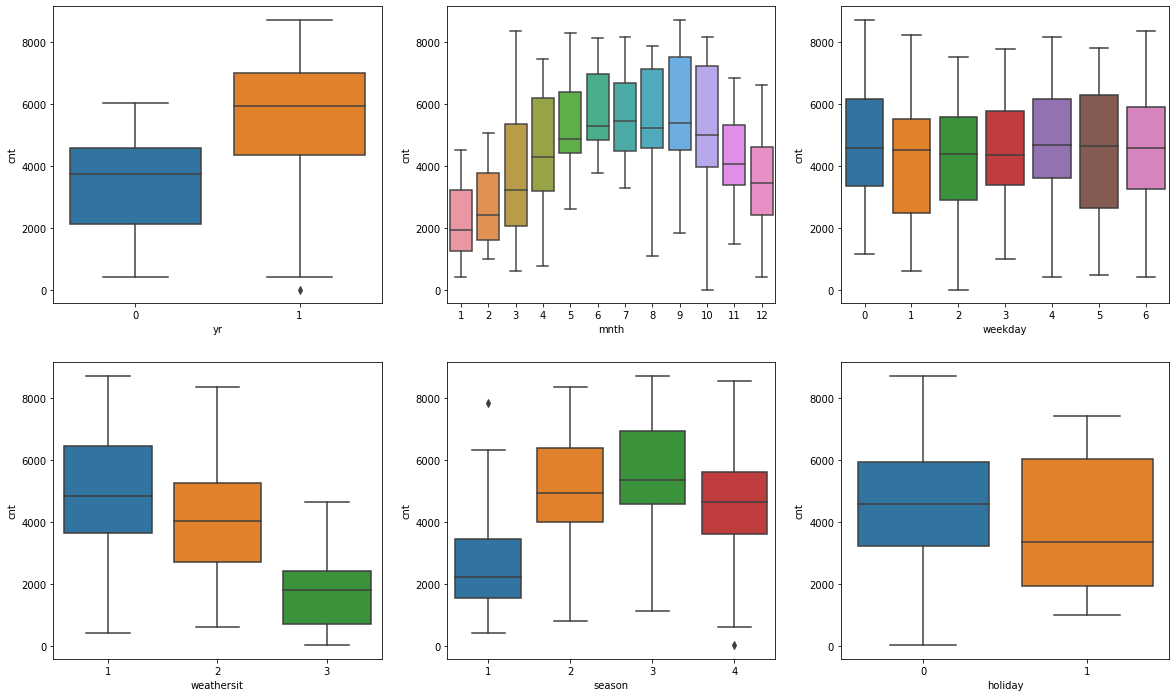

In [12]:
#categorical data consistency check using box plot

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bikedata)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikedata)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikedata)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikedata)
plt.subplot(2,3,5)
sns.boxplot(x = 'season', y = 'cnt', data = bikedata)
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikedata)
plt.show()

#### <span style="color:RoyalBlue ;"> Pairplot to check Correlation between the variables

In [13]:
#pairplot between all the variables
#sns.set_theme(style="darkgrid")
#sns.pairplot(bikedata,kind="reg")
#plt.show()

####Heatmap

Heatmap to see the exact value of correlation

In [14]:
#plt.figure(figsize=(32,20))

#mask = np.array(bikedata.corr())
#mask[np.tril_indices_from(mask)] = False
#sns.heatmap(bikedata.corr(), mask=mask, vmax=.7, square=True, annot=True, cmap = "YlGnBu");


Based on the sets of pairplot, the heatmap, and understanding of the data:
*   instant collumn doesn't have any implication on the cnt, and can be dropped.
*   the correlation between temp and atemp is high (0.99), and they are simmilarly correlated with cnt, so one of them can be dropped. We can drop atemp
*   The sum of the count of casual and registered is equal to total count i.e. cnt, and hence both can be dropped directly
*   mnth and clm highly correlated (0.83), and hence one of these can be dropped. It is also supported by the fact that season mostly changes with mnth. Hence mnth collumn can be dropped.


####Drop the Decided Variables 

So, lets drop the following Variables based on above conclusions:

*   instant
*   atemp
*   dteday
*   casual
*   registered
*   mnth


In [15]:
bikedata.drop(['instant', 'dteday','casual', 'registered',"atemp",'mnth'],axis=1,inplace=True)

In [16]:
bikedata.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,0,5,1,1,9.305237,43.6957,12.522300,1600


#### <span style="color:RoyalBlue ;">Recheck the Collinearity

In [17]:
#plt.figure(figsize=(32,20))

#mask = np.array(bikedata.corr())
#mask[np.tril_indices_from(mask)] = False
#sns.heatmap(bikedata.corr(), mask=mask, vmax=.7, square=True, annot=True, cmap = "YlGnBu");


# <span style="color:IndianRed ;">4. Dummy Creation
# <span style="color:IndianRed ;">

####Prepare the Data for dummyfication

**Step 1:**

*   Now, we need to ensure that All the categorical variable in the dataset has has its value in terms of binary (1 and 0). Here are the three such variables:
    *   `weathersit`
    *   `season`
    *   `weekend`

**Step 2:**
- Change these categorical variable from integer data type to string, so that can be converted to Dummy variables

In [18]:
#Replace weathersit values
bikedata.weathersit.replace({1:"Clear",2: "MistyWeather", 3: "LightRain",4:"HeavyRain"},inplace=True)

#Replace season values
bikedata.season.replace({1:"Spring",2:"Summer", 3:"Fall", 4:"Winter"},inplace=True)

#Replace weekday values
bikedata.weekday.replace({0:'Sun',1:'Mon', 2:'Tue', 3:'Wed', 4:'Thur', 5:'Fri', 6:'Sat'},inplace=True)

In [19]:
#Replace 
print(bikedata.weathersit.value_counts())
print ("*"*75)
#Replace season values
print(bikedata.season.value_counts())
print ("*"*75)

#Replace weekday values
print(bikedata.weekday.value_counts())
print ("*"*75)


Clear           463
MistyWeather    246
LightRain        21
Name: weathersit, dtype: int64
***************************************************************************
Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64
***************************************************************************
Mon     105
Tue     105
Sun     104
Sat     104
Fri     104
Wed     104
Thur    104
Name: weekday, dtype: int64
***************************************************************************


So, it is converted, and now we can dummify these columns

####Create Dummy for applicable categorical columns

In [20]:
# Create a dataset with all the variables which needs dummy data creation
bikedata_dummy=bikedata[['weekday','season','weathersit']]


In [21]:
# Create dummies
dummy=pd.get_dummies(bikedata_dummy, drop_first=True)

In [22]:
# Verify
dummy.head()

,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather
0,1,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,1,0,1,0,0,0,1
2,0,0,0,0,0,1,1,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [23]:
# concat the bikedata with the dummy dataset
bikedata=pd.concat([bikedata, dummy],axis=1)

####Drop the weekday, season and weathersit columns

In [24]:
#Drop the columns for which we have already created dummy variables
bikedata.drop(['weekday','season','weathersit'],axis=1,inplace=True)

###Finalised Dataset

In [25]:
#Verify
bikedata.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,0,1,1,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,0,1,0,0,0,0


# <span style="color:IndianRed ;">5. Split the data into train and test

In [26]:
#Split the dataset in to train and test
df_train, df_test = train_test_split(bikedata,train_size=0.7,random_state=100 )
print ("Shape of Train Data: ", df_train.shape)
print ("Shape of Test Data: ", df_test.shape)


Shape of Train Data:  (510, 18)
Shape of Test Data:  (220, 18)


In [27]:
# verify the train dataset
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,0,0,1,0,0,0,1,0,0,0,1
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,0,0,0,1,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,0,1,0,0,0,0,1,0,0,1
111,0,0,0,13.803347,72.9583,14.707907,1683,0,0,1,0,0,0,0,1,0,0,1


In [28]:
# Verify test dataset
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,0,0,1,0,0,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,0,0,1,0,0,0,1,0,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,1,0,0,0,0,0,0,1,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,0,1,0,0,0


In [29]:
# check the description for train dataset
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,20.108257,63.123710,12.834912,4485.337255,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,0.157763,0.453386,7.431626,14.153170,5.292031,1950.666077,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
# Verify the total columns in bikedataset
bikedata.shape , bikedata.columns

((730, 18),
 Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
        'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
        'weekday_Tue', 'weekday_Wed', 'season_Spring', 'season_Summer',
        'season_Winter', 'weathersit_LightRain', 'weathersit_MistyWeather'],
       dtype='object'))

# <span style="color:IndianRed ;">6. Rescaling the Variables 


In [31]:
# Instantiate an object
scaler = MinMaxScaler()
 
# Create the list of Numeric Variables to be scaled
num_vars = ['temp','hum','windspeed','cnt']
 
#fit on data
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train[num_vars].head()

,temp,hum,windspeed,cnt
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [32]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,1,0,0,0,1,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,1,0,0,0,0,1,0,0,1
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,0,1,0,0,0,0,1,0,0,1


In [33]:
# check the description after scaling
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thur,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_LightRain,weathersit_MistyWeather
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.243137,0.247059,0.247059,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.429398,0.431725,0.431725,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


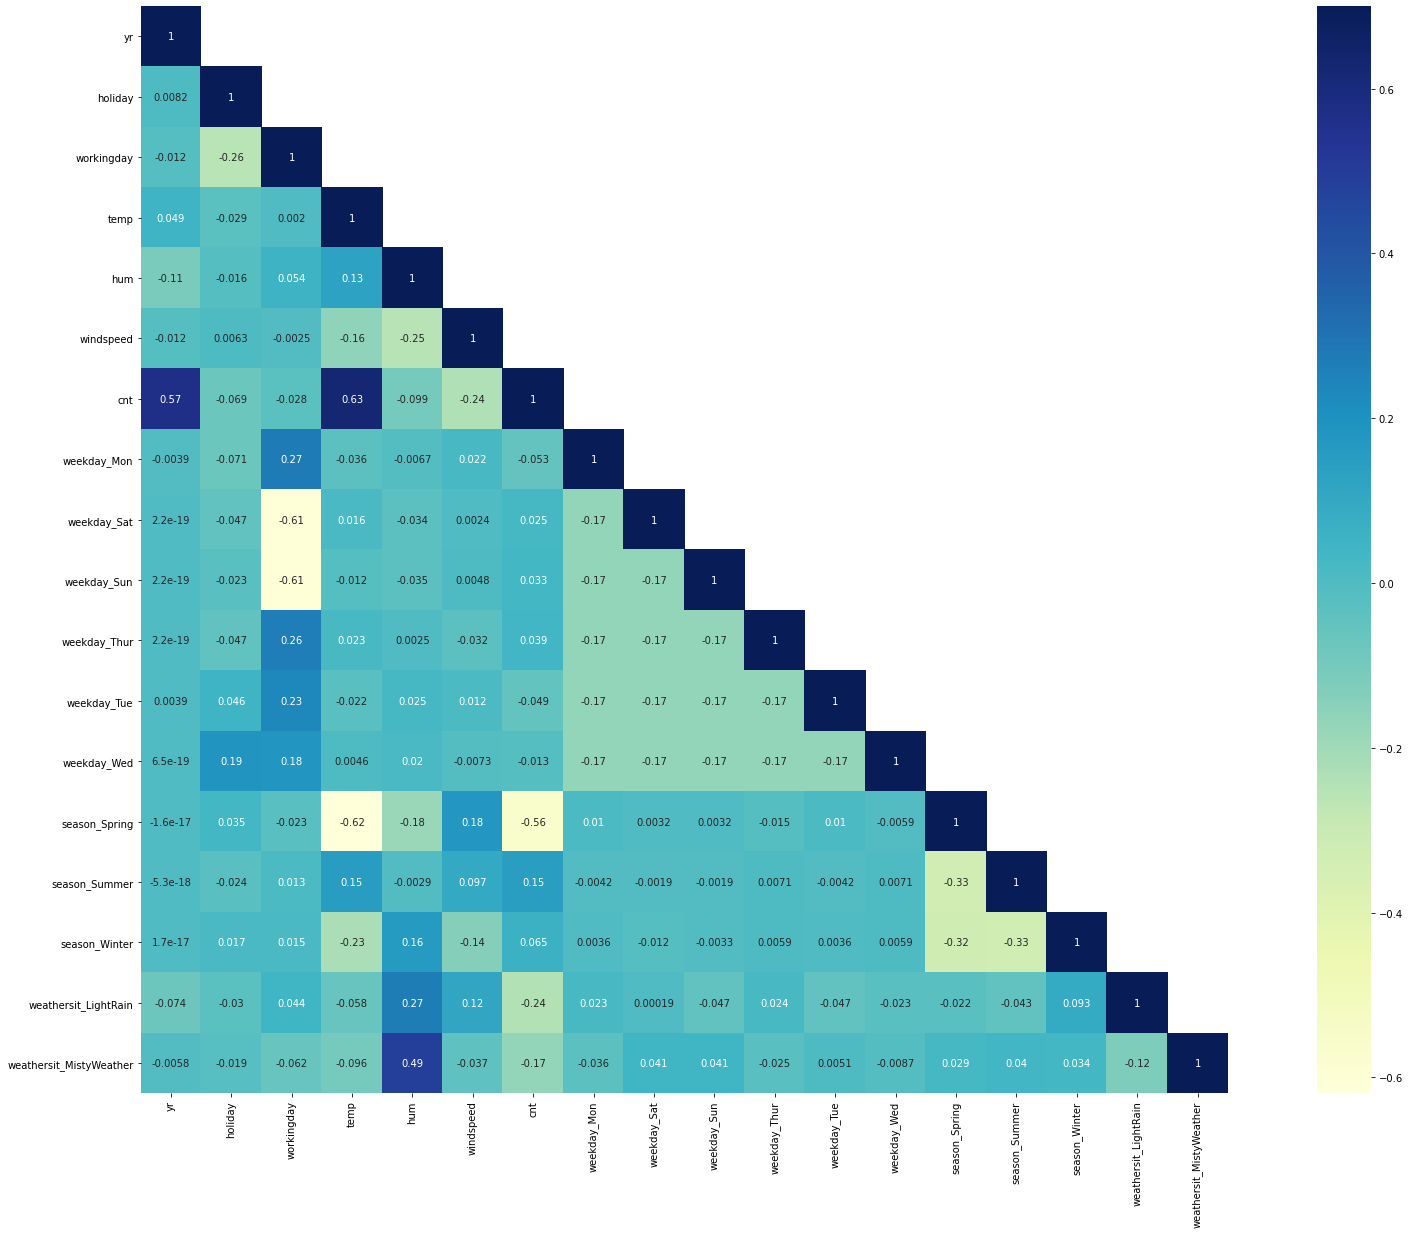

In [34]:
plt.figure(figsize=(32,20))


mask = np.array(bikedata.corr())
mask[np.tril_indices_from(mask)] = False
sns.heatmap(bikedata.corr(), mask=mask, vmax=.7, square=True, annot=True, cmap = "YlGnBu");


# <span style="color:IndianRed ;">7. Model building
Fit a regression line through the training data using `statsmodels`.

### Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

##Machine Learning Model 1

In [36]:
#Build a linear model
X_train_lm_0 = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm_0).fit()
lr_1.params

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     142.5
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.43e-177
Time:                        21:28:33   Log-Likelihood:                 492.60
No. Observations:                 510   AIC:                            -949.2
Df Residuals:                     492   BIC:                            -873.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [37]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     142.5
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.43e-177
Time:                        21:28:34   Log-Likelihood:                 492.60
No. Observations:                 510   AIC:                            -949.2
Df Residuals:                     492   BIC:                            -873.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [38]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,43.90
4,hum,36.54
3,temp,21.63
8,weekday_Sun,8.43
7,weekday_Sat,8.09
12,season_Spring,5.47
5,windspeed,5.41
14,season_Winter,4.00
13,season_Summer,2.65
16,weathersit_MistyWeather,2.40


##Machine Learning Model 2

In [39]:
# drop the variable weekday_Sun
X_train_lm_1 = X_train_lm_0.drop(['weekday_Sun'],axis = 1)

#Rebuilding model without weekday_Sun
X_train_lm_0 = sm.add_constant(X_train_lm_1)

lm = sm.OLS(y_train.astype(float), X_train_lm_0.astype(float)).fit()

#summary
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     151.4
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.78e-178
Time:                        21:28:34   Log-Likelihood:                 492.14
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     493   BIC:                            -878.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_lm_1.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_1.values.astype(float),i) for i in range(X_train_lm_1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,78.23
12,season_Spring,4.55
4,temp,3.52
14,season_Winter,3.10
3,workingday,2.88
13,season_Summer,2.07
5,hum,1.88
10,weekday_Tue,1.73
7,weekday_Mon,1.73
9,weekday_Thur,1.71


##Machine Learning Model 3

In [41]:
# drop the variable weekday_Thur
X_train_lm_2 = X_train_lm_1.drop(['weekday_Thur'],axis = 1)

#Rebuilding model without weekday_Thur
X_train_lm_1 = sm.add_constant(X_train_lm_2)

lm = sm.OLS(y_train.astype(float), X_train_lm_1.astype(float)).fit()

#summary
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     161.8
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.46e-179
Time:                        21:28:34   Log-Likelihood:                 492.08
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     494   BIC:                            -884.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [42]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values.astype(float),i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,78.21
11,season_Spring,4.55
4,temp,3.51
13,season_Winter,3.10
3,workingday,2.21
12,season_Summer,2.07
5,hum,1.88
8,weekday_Sat,1.68
15,weathersit_MistyWeather,1.58
7,weekday_Mon,1.30


##Machine Learning Model 4

In [43]:
# drop the variable weekday_Sat
X_train_lm_3 = X_train_lm_2.drop(['weekday_Sat'],axis = 1)

#Rebuilding model without weekday_Sat
X_train_lm_2 = sm.add_constant(X_train_lm_3)

lm = sm.OLS(y_train.astype(float), X_train_lm_2.astype(float)).fit()

#summary
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     173.6
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.17e-180
Time:                        21:28:34   Log-Likelihood:                 492.00
No. Observations:                 510   AIC:                            -954.0
Df Residuals:                     495   BIC:                            -890.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [44]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_lm_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_2.values.astype(float),i) for i in range(X_train_lm_2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,74.96
10,season_Spring,4.55
4,temp,3.51
12,season_Winter,3.10
11,season_Summer,2.07
5,hum,1.88
14,weathersit_MistyWeather,1.58
3,workingday,1.50
7,weekday_Mon,1.30
8,weekday_Tue,1.30


##Machine Learning Model 5

In [45]:
# drop the variable workingday
X_train_lm_4 = X_train_lm_3.drop(['workingday'],axis = 1)

#Rebuilding model without workingday
X_train_lm_3 = sm.add_constant(X_train_lm_4)

lm = sm.OLS(y_train.astype(float), X_train_lm_3.astype(float)).fit()

#summary
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.3
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          9.47e-182
Time:                        21:28:34   Log-Likelihood:                 491.87
No. Observations:                 510   AIC:                            -955.7
Df Residuals:                     496   BIC:                            -896.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [46]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_lm_3.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_3.values.astype(float),i) for i in range(X_train_lm_3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,73.44
9,season_Spring,4.55
3,temp,3.51
11,season_Winter,3.10
10,season_Summer,2.07
4,hum,1.88
13,weathersit_MistyWeather,1.56
12,weathersit_LightRain,1.25
5,windspeed,1.20
8,weekday_Wed,1.12


##Machine Learning Model 6

In [47]:


# drop the variable weekday_Wed
X_train_lm_5 = X_train_lm_4.drop(['weekday_Wed'],axis = 1)

#Rebuilding model without weekday_Wed
X_train_lm_4 = sm.add_constant(X_train_lm_5)

lm = sm.OLS(y_train.astype(float), X_train_lm_4.astype(float)).fit()

#summary
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.7
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          1.12e-182
Time:                        21:28:34   Log-Likelihood:                 491.31
No. Observations:                 510   AIC:                            -956.6
Df Residuals:                     497   BIC:                            -901.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_lm_5.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_5.values.astype(float),i) for i in range(X_train_lm_5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,73.05
8,season_Spring,4.55
3,temp,3.51
10,season_Winter,3.10
9,season_Summer,2.07
4,hum,1.88
12,weathersit_MistyWeather,1.56
11,weathersit_LightRain,1.25
5,windspeed,1.20
6,weekday_Mon,1.05


##Machine Learning Model 7

In [49]:
# drop the variable season_Spring
X_train_lm_6 = X_train_lm_5.drop(['season_Spring'],axis = 1)

#Rebuilding model without season_Spring
X_train_lm_5 = sm.add_constant(X_train_lm_6)

lm = sm.OLS(y_train.astype(float), X_train_lm_5.astype(float)).fit()

#summary
print (lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     214.6
Date:                Sat, 31 Jul 2021   Prob (F-statistic):          5.54e-181
Time:                        21:28:34   Log-Likelihood:                 484.50
No. Observations:                 510   AIC:                            -945.0
Df Residuals:                     498   BIC:                            -894.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [50]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_lm_6.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm_6.values.astype(float),i) for i in range(X_train_lm_6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

,Features,VIF
0,const,45.10
4,hum,1.86
11,weathersit_MistyWeather,1.55
9,season_Winter,1.25
10,weathersit_LightRain,1.24
3,temp,1.23
5,windspeed,1.18
8,season_Summer,1.14
6,weekday_Mon,1.05
7,weekday_Tue,1.05


Now, the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using this model.

#Delete

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
# drop the variable season_Spring
X_train_lm_6 = X_train_lm_5.drop(['season_Spring'],axis = 1)

#Rebuilding model without season_Spring
X_train_lm_5 = sm.add_constant(X_train_lm_6)

lm = sm.OLS(y_train.astype(float), X_train_lm_5.astype(float)).fit()

#summary
print (lm.summary())

# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
y_train_price = lm.predict(X_train_lm)

NameError: ignored

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [ ]:
df_test.describe()

#### Dividing into X_test and y_test

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [ ]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["bedrooms", "semi-furnished", "basement"], axis = 1)

In [ ]:
# Making predictions using the fourth model

y_pred_m4 = lr_4.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line is:

$ price = 0.236  \times  area + 0.202  \times  bathrooms + 0.11 \times stories + 0.05 \times mainroad + 0.04 \times guestroom + 0.0876 \times hotwaterheating + 0.0682 \times airconditioning + 0.0629 \times parking + 0.0637 \times prefarea - 0.0337 \times unfurnished $


Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Add new features (bathrooms/bedrooms, area/stories, etc.)
2. Build a non-linear model

In [ ]:
Delete

In [ ]:

lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.params

In [ ]:
print(lr_2.summary())


In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
delete

In [ ]:
#Using RFE to build our model
lm = LinearRegression()
lm.fit(X_train, y_train)

#run RFE by choosing top 25 variables
rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
#check the rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
column = X_train.columns[rfe.support_]
column

In [ ]:
X_train.columns[~rfe.support_]

### Let us look at detailed statistics using statsmodel

In [ ]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[column]

In [ ]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

#Run the Linear Model
lm = sm.OLS(y_train.astype(float),X_train_rfe.astype(float)).fit()

In [ ]:
# print the summary
print(lm.summary())

In [ ]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values.astype(float),i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

In [ ]:
# drop the variable workingday
X_train_new = X_train_rfe.drop(['workingday'],axis = 1)

#Rebuilding model without workingday
X_train_lm = sm.add_constant(X_train_new)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
lm.summary()

In [ ]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values.astype(float),i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

In [ ]:
# drop the variable holiday
X_train_n2 = X_train_new.drop(['holiday'],axis = 1)

#Rebuilding model without 'holiday'
X_train_lm = sm.add_constant(X_train_n2)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

In [ ]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n2.columns
vif['VIF'] = [variance_inflation_factor(X_train_n2.values.astype(float),i) for i in range(X_train_n2.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

In [ ]:
# drop the variable 'weekday_Thursday'
X_train_n3 = X_train_n2.drop(['weekday_Thursday'],axis = 1)

#Rebuilding model without 'weekday_Thursday'
X_train_lm = sm.add_constant(X_train_n3)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

In [ ]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n3.columns
vif['VIF'] = [variance_inflation_factor(X_train_n3.values.astype(float),i) for i in range(X_train_n3.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

In [ ]:
# drop the variable 'mnth_Aug'
X_train_n4 = X_train_n3.drop(['mnth_Aug'],axis = 1)

#Rebuilding model without 'mnth_Aug'
X_train_lm = sm.add_constant(X_train_n4)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

In [ ]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n4.columns
vif['VIF'] = [variance_inflation_factor(X_train_n4.values.astype(float),i) for i in range(X_train_n4.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

In [ ]:
# drop the variable 'weekday_Sunday'
X_train_n5 = X_train_n4.drop(['weekday_Sunday'],axis = 1)

#Rebuilding model without 'weekday_Sunday'
X_train_lm = sm.add_constant(X_train_n5)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

In [ ]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n5.columns
vif['VIF'] = [variance_inflation_factor(X_train_n5.values.astype(float),i) for i in range(X_train_n5.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

In [ ]:
# drop the variable 'weekday_Tuesday'
X_train_n6 = X_train_n5.drop(['weekday_Tuesday'],axis = 1)

#Rebuilding model without 'weekday_Tuesday'
X_train_lm = sm.add_constant(X_train_n6)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

In [ ]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n6.columns
vif['VIF'] = [variance_inflation_factor(X_train_n6.values.astype(float),i) for i in range(X_train_n6.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

In [ ]:
# drop the variable 'mnth_May'
X_train_n7 = X_train_n6.drop(['mnth_May'],axis = 1)

#Rebuilding model without 'mnth_May'
X_train_lm = sm.add_constant(X_train_n7)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

In [ ]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n7.columns
vif['VIF'] = [variance_inflation_factor(X_train_n7.values.astype(float),i) for i in range(X_train_n7.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

In [ ]:
# drop the variable 'season_Spring'
X_train_n8 = X_train_n7.drop(['season_Spring'],axis = 1)

#Rebuilding model without 'season_Spring'
X_train_lm = sm.add_constant(X_train_n8)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

In [ ]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n8.columns
vif['VIF'] = [variance_inflation_factor(X_train_n8.values.astype(float),i) for i in range(X_train_n8.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

In [ ]:
# drop the variable 'weekday_Monday'
X_train_n9 = X_train_n8.drop(['weekday_Monday'],axis = 1)

#Rebuilding model without 'weekday_Monday'
X_train_lm = sm.add_constant(X_train_n9)

lm = sm.OLS(y_train.astype(float), X_train_lm.astype(float)).fit()

#summary
print(lm.summary())

In [ ]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X_train_n9.columns
vif['VIF'] = [variance_inflation_factor(X_train_n9.values.astype(float),i) for i in range(X_train_n9.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending = False)
vif

In [ ]:
#drop contsant term
X_train_final = X_train_n9.drop(['const'], axis=1)

**Values of P for all variables are < 0.05**
**All values of VIF are < 5**

## The number of variables are 15 excluding the constant which has given the desired R-squared, p value and VIF

## Step 4. Residual Analysis

In [ ]:
# Let us look at the residual analysis to see if the distribution is normal
y_train_pred = lm.predict(X_train_lm.astype(float))

fig = plt.figure()
residual = y_train - y_train_pred
sns.distplot(residual)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [ ]:
# Lets us check if the error terms are independant
sns.scatterplot(data = residual)

**Residual Analysis also shows that:**
- Error terms are normalized (mean is zero)
- Error terms are independant

## STEP 5: Predictions and Evaluations on Test Set

In [ ]:
#create a list of numeric variables
num_vars = ['temp','hum','windspeed', 'cnt']

#2. Transform Test data set

df_test[num_vars] = scl.transform(df_test[num_vars])
df_test.head()

In [ ]:
df_test.describe()

In [ ]:
y_test = df_test.pop('cnt')
X_test = df_test

In [ ]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_final.columns]
X_test_new = X_test_new.astype(float)

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

### Model Evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [ ]:
#evaluate
r2_score(y_true = y_test,y_pred = y_pred)

**Overall we have a good model with almost 81% of variance in the output being explained by the model.**

### The following 3 variables are significant in the demand of shared bikes
- Temperature: 
- Season: Winter
- Month: January